# Titanic Spaceship

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

In [3]:
Train = pd.read_csv("train.csv")
Test = pd.read_csv("test.csv")

In [4]:
Train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


# Analyse exploratoire

In [5]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<Axes: xlabel='HomePlanet', ylabel='Count'>

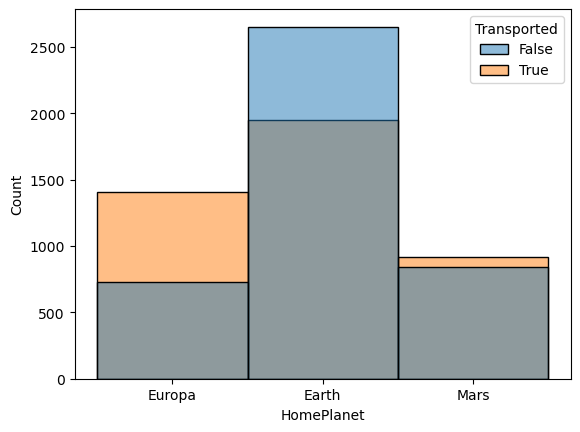

In [6]:
sns.histplot(data=Train, x='HomePlanet', hue='Transported')

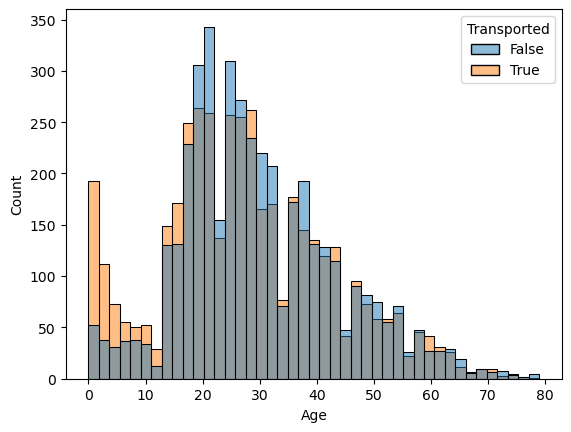

In [7]:
sns.histplot(data=Train, x='Age', hue='Transported')
#Faire une catégorie d'age Mineur/Majeur
Train['Mineur'] = Train['Age'].apply(lambda x: 1 if x <18 else 0)

In [8]:
from scipy.stats import chi2_contingency
table = pd.crosstab(index=Train['CryoSleep'], columns=Train['Transported'], normalize=True)
print(table)
#Les cryogénisés on plus de chances d'êtres sauvés

Transported     False     True 
CryoSleep                      
False        0.430628  0.211067
True         0.065361  0.292945


In [9]:
table = pd.crosstab(index=Train['VIP'], columns=Train['Transported'], normalize=True)
print(table)
#Il n'y a pas de différence notable 

Transported     False     True 
VIP                            
False        0.482097  0.494464
True         0.014488  0.008952


C:\Users\taeud\AppData\Local\Temp\ipykernel_17256\314175459.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\taeud\AppData\Local\Temp\ipykernel_17256\314175459.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\taeud\AppData\Local\Temp\ipykernel_17256\314175459.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\taeud\AppData\Local\Temp\ipykernel_17256\314175459.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


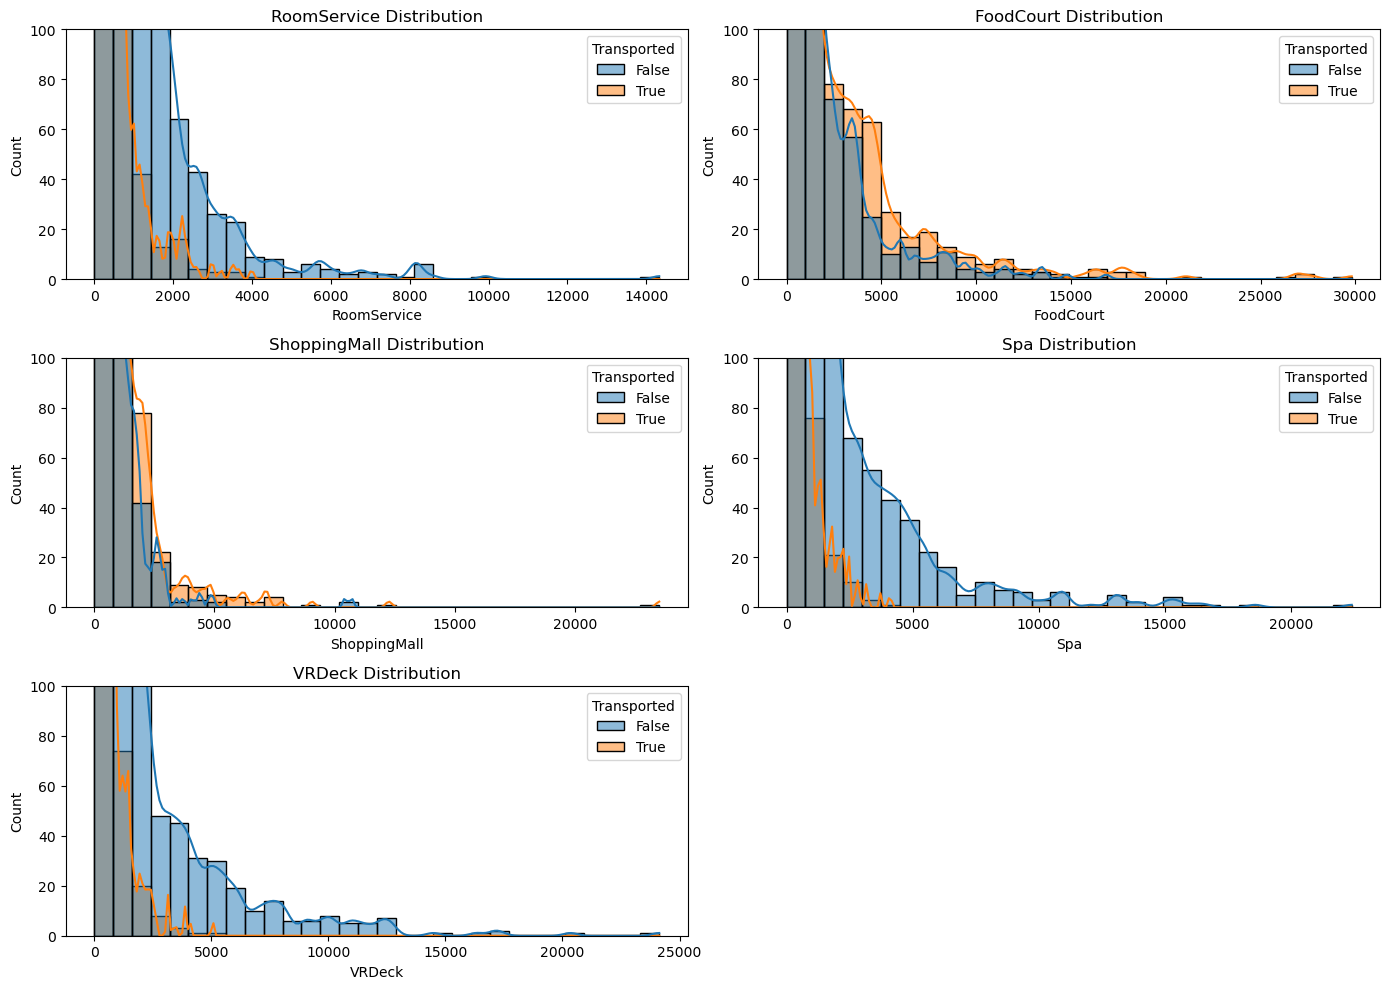

In [10]:
#Analyse 

exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

plt.figure(figsize=(14,10))
for idx,column in enumerate(exp_cols):
    plt.subplot(3,2,idx+1)
    sns.histplot(x=column, hue="Transported", data=Train,bins=30,kde=True)
    plt.title(f"{column} Distribution")
    plt.ylim(0,100)
    plt.tight_layout()

In [11]:
#Traitement des groupes: Creation de familles
Train[['PassengerGroup','Passenger_NGroup']] = Train['PassengerId'].str.split('_', n=1, expand=True)

#Taille du groupe
Train['TailleGroupe'] = Train.groupby(['PassengerGroup'])['PassengerGroup'].transform('count')

#Creation de la variable Famille
Train[['Prenom','NomDeFamille']] = Train['Name'].str.split(' ', n=1, expand=True)
Train['Occurrences'] = Train.groupby(['PassengerGroup', 'NomDeFamille'])['NomDeFamille'].transform('count') #Un individu est de la même famille si même ID + même nom de famille
Train['Famille'] = Train['Occurrences'].apply(lambda x: 1 if x >= 2 else 0)
Train.drop(labels=['Occurrences'], axis=1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,Mineur,PassengerGroup,Passenger_NGroup,TailleGroupe,Prenom,NomDeFamille,Famille
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,0,0001,01,1,Maham,Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,0,0002,01,1,Juanna,Vines,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,0,0003,01,2,Altark,Susent,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,0,0003,02,2,Solam,Susent,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,1,0004,01,1,Willy,Santantines,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,74.0,Gravior Noxnuther,False,0,9276,01,1,Gravior,Noxnuther,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,0.0,Kurta Mondalley,False,0,9278,01,1,Kurta,Mondalley,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,0.0,Fayey Connon,True,0,9279,01,1,Fayey,Connon,0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,3235.0,Celeon Hontichre,False,0,9280,01,2,Celeon,Hontichre,1


In [12]:
Train[['Deck','Num','Side']] = Train['Cabin'].str.split('/', n=2, expand=True)

<Axes: >

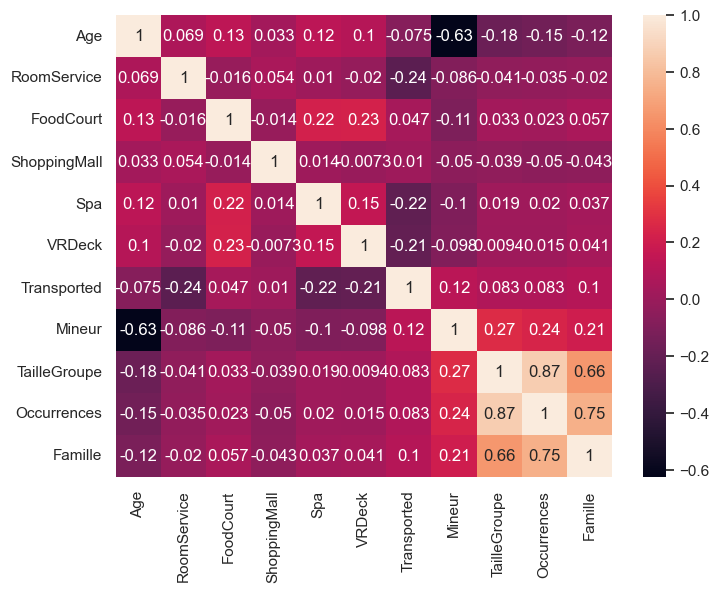

In [13]:
#Matrice des corrélations
sns.set(rc = {'figure.figsize':(8,6)})
Correlations = Train.select_dtypes(include=['boolean','number']).corr()
sns.heatmap(Correlations, annot=True)

In [14]:
#Recherche de la linéairité ou non du problème
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selection des colonnes numériques et remplacement des valeurs manquantes
X = Train.select_dtypes(include=['number'])
X = X.fillna(0)

#Conversion de Transported en numérique pour l'ACP
y = Train.select_dtypes(include=['boolean'])
y = y.astype(int)
y_categorical = y.astype('category')

# Normalisation
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Créez un objet PCA
pca = PCA(n_components=6)  # Spécifiez le nombre de composantes principales (ici, 6)

# Appliquez la PCA aux données normalisées
X_pca = pca.fit_transform(X_std)

# Créez un DataFrame pour les composantes principales
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, 7)]) # Inertie > 80%

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


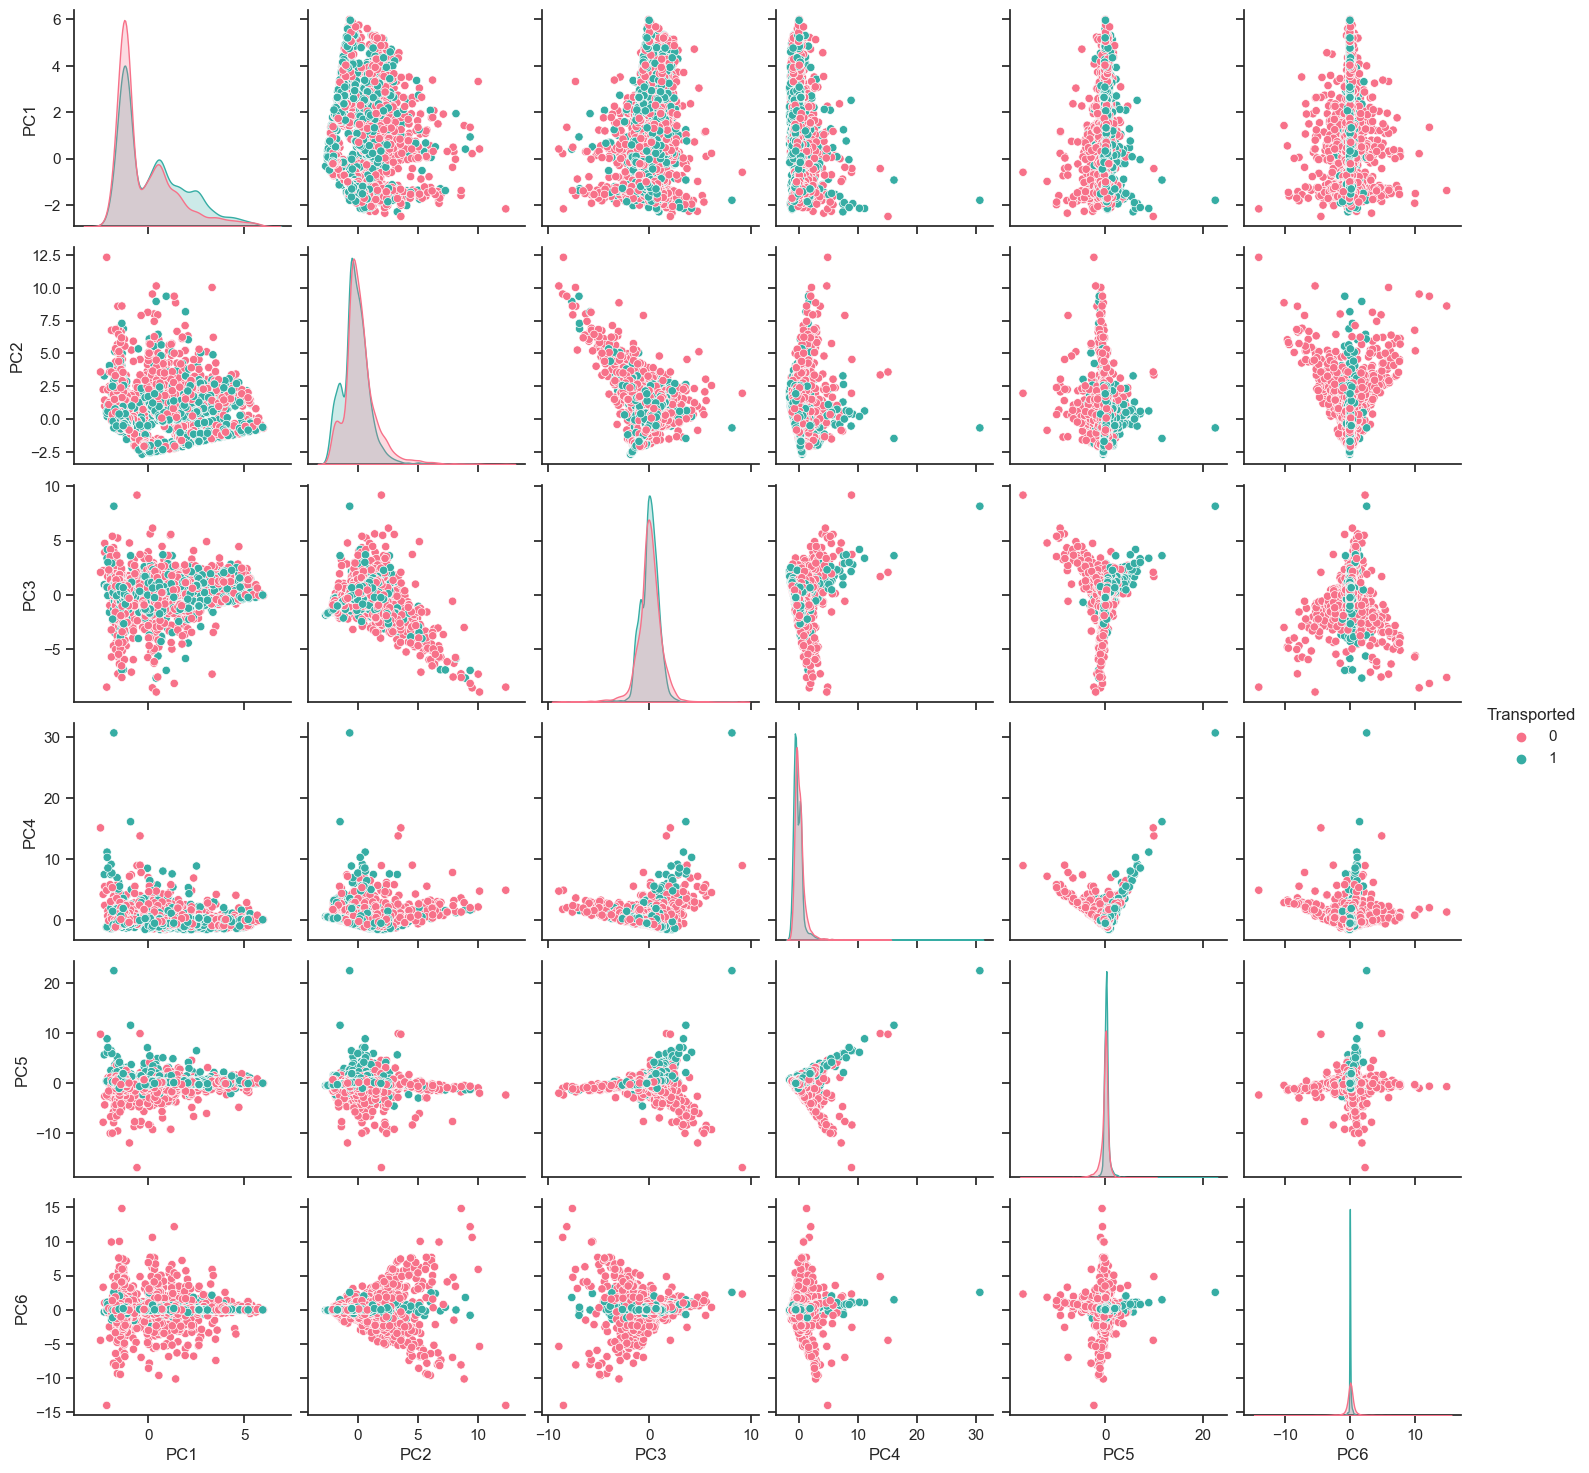

In [15]:
pca_df_with_hue = pca_df.copy()
pca_df_with_hue['Transported'] = y_categorical

sns.set(style="ticks")
sns.pairplot(pca_df_with_hue, hue='Transported', palette='husl')
plt.show()

In [16]:
# Vecteurs propres
pca_components = pca.components_
pca_components_df = pd.DataFrame(data=pca_components, columns=X.columns)

print(pca_components_df.T)
#Dim1 = Groupe de voyageur (TailleGroupe, Occurences et Famille)
#Dim2 = Dépenses (Food Court, Spa et VRDeck)
#Dim3 = Dépenses Shopping et Cabine (RoomService, ShoppingMall)
#Dim4 = Dépenses Shopping opposé à Cabine (RoomService, ShoppingMall)
#Dim5 = Spa

#Non linéaire

                     0         1         2         3         4         5
Age          -0.243836  0.477408  0.388043 -0.262841  0.136642 -0.016089
RoomService  -0.056125  0.068375  0.420929  0.436380 -0.782154  0.106735
FoodCourt    -0.006765  0.440043 -0.403302  0.123192 -0.082339 -0.000305
ShoppingMall -0.055849  0.024703  0.242345  0.771267  0.578554  0.072689
Spa          -0.014024  0.393820 -0.308895  0.252521 -0.100347 -0.701160
VRDeck       -0.014319  0.378333 -0.400694  0.105619 -0.040863  0.700584
Mineur        0.308234 -0.432151 -0.361509  0.225219 -0.112318 -0.013186
TailleGroupe  0.536377  0.141499  0.125624 -0.022387  0.039396 -0.002090
Occurrences   0.547467  0.174097  0.171271 -0.055198  0.042394  0.001798
Famille       0.501397  0.194533  0.138139 -0.035561  0.018872  0.020990


# Elaboration du modèle

In [17]:
import xgboost as xgb

In [18]:
Train = Train.drop(['PassengerId','Cabin','Destination','PassengerGroup','Passenger_NGroup','Name','Prenom','NomDeFamille','Num'], axis=1)

In [19]:
List_to_category = ['CryoSleep','HomePlanet','Deck','Side','VIP']
Train[List_to_category]=Train[List_to_category].astype('category')
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   HomePlanet    8492 non-null   category
 1   CryoSleep     8476 non-null   category
 2   Age           8514 non-null   float64 
 3   VIP           8490 non-null   category
 4   RoomService   8512 non-null   float64 
 5   FoodCourt     8510 non-null   float64 
 6   ShoppingMall  8485 non-null   float64 
 7   Spa           8510 non-null   float64 
 8   VRDeck        8505 non-null   float64 
 9   Transported   8693 non-null   bool    
 10  Mineur        8693 non-null   int64   
 11  TailleGroupe  8693 non-null   int64   
 12  Occurrences   8493 non-null   float64 
 13  Famille       8693 non-null   int64   
 14  Deck          8494 non-null   category
 15  Side          8494 non-null   category
dtypes: bool(1), category(5), float64(7), int64(3)
memory usage: 731.0 KB


In [20]:
Train

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Mineur,TailleGroupe,Occurrences,Famille,Deck,Side
0,Europa,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,1,1.0,0,B,P
1,Earth,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,1,1.0,0,F,S
2,Europa,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,2,2.0,1,A,S
3,Europa,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,2,2.0,1,A,S
4,Earth,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1,1.0,0,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,0,1,1.0,0,A,P
8689,Earth,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False,0,1,1.0,0,G,S
8690,Earth,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,0,1,1.0,0,G,S
8691,Europa,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,0,2,2.0,1,E,S


In [21]:
X,y = Train.drop('Transported', axis=1), Train[['Transported']]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#Transformation des jeux d'apprentissage et de test sous forme de DMatrix
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [23]:
# Dictionnaire d'hyperparamètres - Minimisation de la MSE, utilisation du gpu pour la construction d'arbres
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]
n = 10000

model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=10, #Evaluation tous les 10 rounds
   early_stopping_rounds=50 #Arrêt si non amélioration des résultats après 50 rounds
)

[0]	train-rmse:0.43946	validation-rmse:0.44278
[10]	train-rmse:0.33426	validation-rmse:0.36880
[20]	train-rmse:0.31251	validation-rmse:0.36969
[30]	train-rmse:0.29568	validation-rmse:0.37265
[40]	train-rmse:0.28007	validation-rmse:0.37322
[50]	train-rmse:0.26896	validation-rmse:0.37391
[60]	train-rmse:0.25917	validation-rmse:0.37622
[67]	train-rmse:0.25097	validation-rmse:0.37703


In [24]:
from sklearn.metrics import mean_squared_error

preds = model.predict(dtest_reg)
rmse = mean_squared_error(y_test, preds, squared=False)
print(f"MSE du modèle : {rmse:.3f}")

MSE du modèle : 0.377


In [25]:
#Technique nfold
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
n = 1000

results = xgb.cv(
   params, dtrain_reg,
   num_boost_round=n,
   nfold=5,
   early_stopping_rounds=20
)

In [28]:
results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.439370,0.001599,0.444448,0.002052
1,0.402671,0.001486,0.413704,0.003546
2,0.380211,0.001814,0.395957,0.003982
3,0.365897,0.001240,0.385549,0.005545
4,0.356433,0.001542,0.380315,0.005904


In [29]:
best_rmse = results['test-rmse-mean'].min()

best_rmse

0.37459097794606866

In [30]:
from sklearn.preprocessing import OrdinalEncoder
X,y = Train.drop('Transported', axis=1), Train[['Transported']]
y = OrdinalEncoder().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)



In [31]:
#Transformation des jeux d'apprentissage et de test sous forme de DMatrix
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [32]:
params = {"objective": "multi:softprob", "tree_method": "gpu_hist", "num_class": 2}
n = 1000

results = xgb.cv(
   params, dtrain_reg,
   num_boost_round=n,
   nfold=5,
   metrics=["mlogloss", "auc", "merror"],
)

In [33]:
rounds_needed = results['test-auc-mean'].idxmax()
#19 rounds de boosting

In [34]:
#Recherche du cutoff 
results = xgb.cv(
   params, dtrain_reg,
   num_boost_round=rounds_needed,
   nfold=5,
   metrics=["mlogloss", "auc", "merror"]
)

In [35]:
print(results.columns)

Index(['train-mlogloss-mean', 'train-mlogloss-std', 'train-auc-mean',
       'train-auc-std', 'train-merror-mean', 'train-merror-std',
       'test-mlogloss-mean', 'test-mlogloss-std', 'test-auc-mean',
       'test-auc-std', 'test-merror-mean', 'test-merror-std'],
      dtype='object')


In [36]:
best_cutoff = 0.0
best_auc = 0.0

# Faites varier le cutoff de 0 à 1 avec un pas de 0,01
for cutoff in [i / 100 for i in range(101)]:
    # Calculez l'AUC pour chaque cutoff en utilisant les résultats de validation croisée
    auc_values = results[f'test-auc-mean']
    
    # Identifiez le cutoff qui maximise l'AUC
    if auc_values.max() > best_auc:
        best_auc = auc_values.max()
        best_cutoff = cutoff

print("Meilleur cutoff pour maximiser l'AUC:", best_cutoff)
print("Meilleur AUC obtenu avec ce cutoff:", best_auc)

Meilleur cutoff pour maximiser l'AUC: 0.0
Meilleur AUC obtenu avec ce cutoff: 0.8849628791718155


# Application sur l'échantillon test

In [37]:
#Traitment des variables
Test['Mineur'] = Test['Age'].apply(lambda x: 1 if x <18 else 0)
#Traitement des groupes: Creation de familles
Test[['PassengerGroup','Passenger_NGroup']] = Test['PassengerId'].str.split('_', n=1, expand=True)

#Taille du groupe
Test['TailleGroupe'] = Test.groupby(['PassengerGroup'])['PassengerGroup'].transform('count')

#Creation de la variable Famille
Test[['Prenom','NomDeFamille']] = Test['Name'].str.split(' ', n=1, expand=True)
Test['Occurrences'] = Test.groupby(['PassengerGroup', 'NomDeFamille'])['NomDeFamille'].transform('count') #Un individu est de la même famille si même ID + même nom de famille
Test['Famille'] = Test['Occurrences'].apply(lambda x: 1 if x >= 2 else 0)
Test.drop(labels=['Occurrences'], axis=1)
Test[['Deck','Num','Side']] = Test['Cabin'].str.split('/', n=2, expand=True)

TestID=Test['PassengerId']
Test = Test.drop(['PassengerId','Cabin','Destination','PassengerGroup','Passenger_NGroup','Name','Prenom','NomDeFamille','Num'], axis=1)
List_to_category = ['CryoSleep','HomePlanet','Deck','Side','VIP']
Test[List_to_category]=Test[List_to_category].astype('category')

In [38]:
X_train, y_train = Train.drop('Transported', axis=1), Train[['Transported']]
X_test = Test

#Transformation des jeux d'apprentissage et de test sous forme de DMatrix
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, enable_categorical=True)

In [39]:
params = {"objective": "multi:softprob", "tree_method": "gpu_hist", "num_class": 2}
n = 1000

model = xgb.train(
    params, 
    dtrain_reg,
    num_boost_round=rounds_needed,
)

predictions = model.predict(dtest_reg)

SyntaxError: positional argument follows keyword argument (2603824358.py, line 9)

In [ ]:
%%time

model = xgb.XGBClassifier(max_depth=12,
                        subsample=0.33,
                        objective='binary:logistic',
                        n_estimators=300,
                        learning_rate = 0.01)
eval_set = [(train_X, train_Y), (test_X, test_Y)]
model.fit(train_X, train_Y.values.ravel(), early_stopping_rounds=15, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)



In [ ]:
Pred = pd.DataFrame(predictions, columns=['Probabilité_1', 'Probabilité_2'])
Decision = Pred['Probabilité_1'] < 0.5
Decision

In [43]:
submission = pd.DataFrame({'PassengerId':TestID,'Transported':Decision})
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook

In [44]:
filename = 'Titanic Spaceship Predictions 1.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic Spaceship Predictions 1.csv
